In [1]:
import pandas as pd
df_salary = pd.read_csv("C:/Users/dell/Desktop/data science projects/Salary.csv")
df_salary

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [2]:
df_salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [3]:
df_salary.skew()



YearsExperience    0.420163
Salary             0.209005
dtype: float64

NameError: name 'plt' is not defined

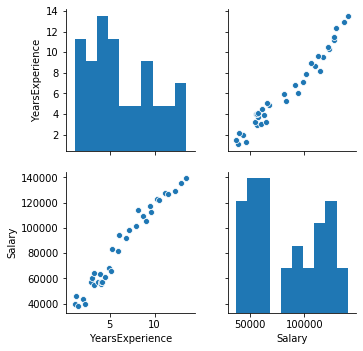

In [5]:
import seaborn as sns
sns.pairplot(df_salary)
plt.show()


In [6]:
from scipy.stats import zscore
z_score = abs(zscore(df_salary))
print(df_salary.shape)
df_salary_final =df_salary.loc[(z_score<3).all(axis=1)]
print(df_salary_final.shape)

(35, 2)
(35, 2)


In [8]:
df_x = df_salary_final.drop(columns=["Salary"])
y=df_salary_final[["YearsExperience"]]

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns = df_x.columns)

In [10]:
x.skew()

YearsExperience    0.420163
dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 55, test_size =0.20)

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score = 0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = r_state, test_size =0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
print("max r2 score for", final_r_state, " is", max_r_score)


max r2 score for 42  is 1.0


In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2").mean()

1.0

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 55, test_size =0.20)
lreg= linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)